In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [3]:
#load the data
from google.colab import files
uploaded=files.upload() 

Saving bank-full.csv to bank-full.csv


In [4]:
bnk=pd.read_csv('bank-full.csv',';')
bnk.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bnk.value_counts()

age  job         marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
18   student     single    primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes    1
45   management  married   tertiary   no       0        no       no    cellular   20   aug    71        2         -1     0         unknown   no     1
                 divorced  tertiary   no       54       no       yes   cellular   21   jul    34        3         -1     0         unknown   no     1
                                               220      yes      no    unknown    18   jun    89        4         -1     0         unknown   no     1
                                               335      no       no    cellular   5    aug    297       1         -1     0         unknown   no     1
                                                                                                         

In [6]:
bnk.shape

(45211, 17)

In [7]:
bnk.drop(bnk[['default','pdays','previous','poutcome']],inplace=True,axis=1)

In [8]:
bnk.shape

(45211, 13)

In [9]:
#removing NA values in data set
bnk=bnk.dropna()
bnk.shape

(45211, 13)

In [10]:
#creat dummy variable for catogorical columns
bnk1=pd.get_dummies(bnk,columns=['job','marital','education','marital','education','housing','loan','contact','month','y'])
bnk1

,age,balance,day,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_no,y_yes
0,58,2143,5,261,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33,2,5,76,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,47,1506,5,92,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45207,71,1729,17,456,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45208,72,5715,17,1127,5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45209,57,668,17,508,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [11]:
#dividing our data into input and output variables
X=bnk1.iloc[:,0:51]
Y=bnk1.iloc[:,51]

In [12]:
#logistic regression and fit the model
classifier=LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
#predict for x dataset
y_pred=classifier.predict(X)

In [14]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [15]:
y_pred_df=pd.DataFrame({'actual':Y,'predicted_prob':classifier.predict(X)})

In [16]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,0


In [17]:
#confusion matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39793   129]
 [  428  4861]]


In [18]:
((39793+4861)/(39793+129+428+4861))*100

98.76799893831148

In [19]:
#ROC

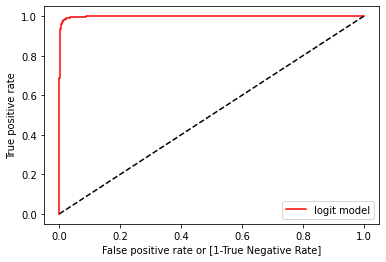

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate or [1-True Negative Rate]')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [21]:
auc=roc_auc_score(Y,y_pred)
auc

0.9579230146355823